dt: 0.5 n: 4
t,x,vx =  0.0 3.0 0.0
tem,xet,vxet =  0.0 3.0 0.0
t= 2 s
v= 6.757479437617921 m/s


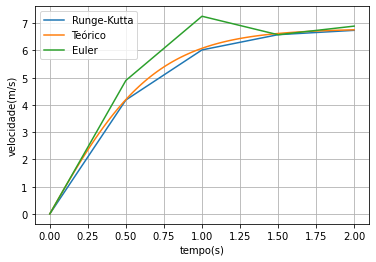

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed May 26 16:10:45 2021

@author: vitor.torres, @adapted pedro.encarnacao
"""

# Volante de badmington - velocidade
# Método de Runge Kutta 4ª ordem

import numpy as np
import matplotlib.pyplot as plt

def acelera(t,x,vx):  
    ax=g-g/vt**2*np.abs(vx)*vx 
    return ax

def rk4(t,x,vx,dt):
    # Modificado
    ax1=acelera(t,x,vx)
    c1v=ax1*dt
    c1x=vx*dt
    ax2=acelera(t+dt/2.,x+c1x/2.,vx+c1v/2.)
    c2v=ax2*dt
    c2x=(vx+c1v/2.)*dt			# predicto:  vx(t+dt) * dt
    ax3=acelera(t+dt/2.,x+c2x/2.,vx+c2v/2.)
    c3v=ax3*dt
    c3x=(vx+c2v/2.)*dt
    ax4=acelera(t+dt,x+c3x,vx+c3v)
    c4v=ax4*dt
    c4x=(vx+c3v)*dt      
    xp=x+(c1x+2.*c2x+2.*c3x+c4x)/6.
    vxp=vx+(c1v+2.*c2v+2.*c3v+c4v)/6.
    return xp,vxp

dt=0.5
tf=2.0
n=np.int(tf/dt+0.1)
print('dt:',dt, "n:",n)

tempo=np.zeros(n+1)
xrk4=np.zeros(n+1)
vxrk4=np.zeros(n+1)
vxe=np.zeros(n+1)

g=9.80
vt=6.80
	  
t0=0.
x0=3.               
vx0=0.
print('t,x,vx = ',t0,x0,vx0)
tempo[0]=t0
vxrk4[0]=vx0
xrk4[0]=x0
tem=t0
xet=x0
vxet=vx0
print('tem,xet,vxet = ',t0,x0,vx0) 
for i in range(n):
    xet,vxet=rk4(tem,xet,vxet,dt)
    tem=tem+dt
    tempo[i+1]=tem
    vxrk4[i+1]=vxet
    xrk4[i+1]=xet      
    vxe[i+1]=vxe[i]+(g-g/vt**2*np.abs(vxe[i])*vxe[i])*dt   # Metodo de Euler
    
te=np.linspace(t0,tf,100)
ve=vt*np.tanh(g*te/vt)
tet=2
vet=vt*np.tanh(g*tet/vt)
print('t=',tet, 's')
print('v=',vet, 'm/s')

plt.grid()    
plt.plot(tempo,vxrk4, label="Runge-Kutta")
plt.plot(te,ve, label = "Teórico")
plt.plot(tempo,vxe, label="Euler")
plt.xlabel("tempo(s)")
plt.ylabel("velocidade(m/s)")
plt.legend()
plt.show()

### 4. 

Um corpo de massa 1 kg move-se num oscilador quártico forçado. Se a posição de equilíbrio for a origem do
eixo 𝑥𝑒𝑞 = 0 m, o oscilador quártico tem a energia potencial

$𝐸𝑝 = \frac{1}{2}𝑘𝑥^2(1 + \alpha 𝑥^2)$

e exerce no corpo a força

$𝐹𝑥= −𝑘 𝑥(1 + \alpha 𝑥^2)$ .

O oscilador é amortecido pela força −𝑏𝑣𝑥 e sujeito à força externa $𝐹_0 cos(\omega 𝑓𝑡)$ .

Considere 𝑘 = 1 N/m, 𝑏 = 0.05 kg/s, 𝛼 = 0.002 N/m2, 𝐹0 = 7.5 N e 𝜔𝑓 = 1.0 rad/s.


a) Calcule numericamente a lei do movimento, no caso em que a velocidade inicial é nula e a posição inicial 3 m.
Tem confiança no seu resultado?

n 2000000
n 20000


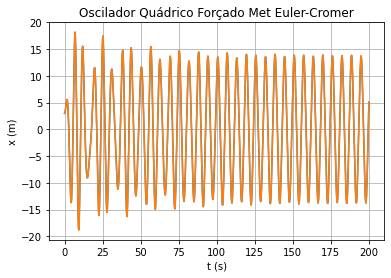

In [3]:
# Oscilador Quártico Forçado
# Método de Euler-Cromer

import numpy as np
import matplotlib.pyplot as plt


def oscilador_quartico(dt,tf):
    n=np.int(tf/dt+0.1)
    print('n',n)
    tempo=np.empty(n+1)
    x=np.empty(n+1)
    vx=np.empty(n+1)
    a=np.empty(n+1)
    Em=np.empty(n+1)

    t0=0.
    x0=3.0            
    vx0=0.0

    tempo[0]=t0
    vx[0]=vx0
    x[0]=x0

    k=1
    m=1
    b=0.05
    F0=7.5
    Wf=1
    alpha=0.002
    ampl=0
    countMax=0
    tMax=[]
    periodo=[]
    for i in range(n):
        tempo[i+1]=tempo[i]+dt
        a[i]=-(k/m)*x[i]*(1+2*alpha*x[i]**2)-(b/m)*vx[i]+(F0/m)*np.cos(Wf*tempo[i])
        vx[i+1]=vx[i]+a[i]*dt        
        x[i+1]=x[i]+vx[i+1]*dt
    
    return a, vx, x, tempo
    
dt=0.0001
tf=200
a_1, vx_1, x_1, t_1 =oscilador_quartico(dt,tf)
dt=0.01
a_2, vx_2, x_2, t_2 =oscilador_quartico(dt,tf)




plt.title('Oscilador Quádrico Forçado Met Euler-Cromer')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.grid()    
plt.plot(t_1,x_1)
plt.plot(t_2,x_2)
plt.show()	



**Temos confiança no resultado porque o resultado é o mesmo quando modificamos o intervalo de tempo ($\delta$t)**

b) Calcule a amplitude do movimento e o seu período no regime estacionário, usando os resultados numéricos.

Amplitude: 13.787 m
Período: 6.277 s


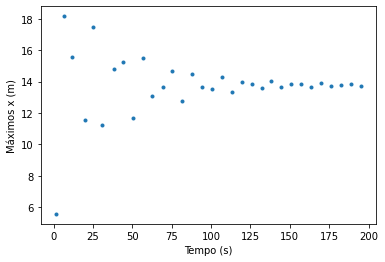

In [21]:
plt.plot(t_1[:-2][np.diff(np.sign(np.diff(x_1)))==-2] , x_1[:-2][np.diff(np.sign(np.diff(x_1)))==-2],".")
plt.xlabel("Tempo (s)")
plt.ylabel("Máximos x (m)")
x_temp = x_1[t_1 > 100]
t_temp = t_1[t_1 > 100]
maximos_x = x_temp[:-2][np.diff(np.sign(np.diff(x_temp)))==-2]
maximos_t = t_temp[:-2][np.diff(np.sign(np.diff(x_temp)))==-2]
print("Amplitude:", np.round(np.mean(maximos_x),3), "m")
print("Período:",  np.round(np.mean(np.diff(maximos_t)),3), "s")


c) Calcule os coeficientes de Fourier da oscilação no regime estacionário

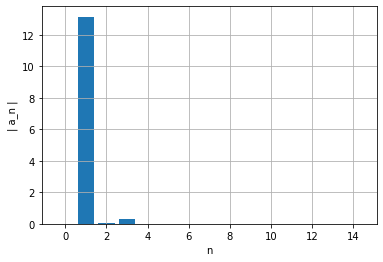

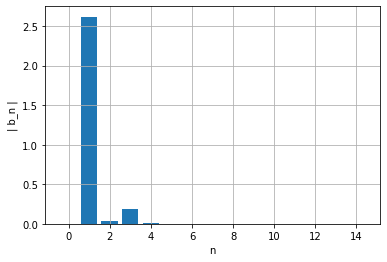

In [22]:
##DO ELEARNING
def abfourier(tp,xp,it0,it1,nf):
#
# cálculo dos coeficientes de Fourier a_nf e b_nf
#       a_nf = 2/T integral ( xp cos( nf w) ) dt   entre tp(it0) e tp(it1)
#       b_nf = 2/T integral ( xp sin( nf w) ) dt   entre tp(it0) e tp(it1)    
# integracao numerica pela aproximação trapezoidal
# input: matrizes tempo tp   (abcissas)
#                 posição xp (ordenadas) 
#       indices inicial it0
#               final   it1  (ao fim de um período)   
#       nf índice de Fourier
# output: af_bf e bf_nf  
# 
    dt=tp[1]-tp[0]
    per=tp[it1]-tp[it0]
    ome=2*np.pi/per

    s1=xp[it0]*np.cos(nf*ome*tp[it0])
    s2=xp[it1]*np.cos(nf*ome*tp[it1])
    st=xp[it0+1:it1]*np.cos(nf*ome*tp[it0+1:it1])
    soma=np.sum(st)
    
    q1=xp[it0]*np.sin(nf*ome*tp[it0])
    q2=xp[it1]*np.sin(nf*ome*tp[it1])
    qt=xp[it0+1:it1]*np.sin(nf*ome*tp[it0+1:it1])
    somq=np.sum(qt)
    
    intega=((s1+s2)/2+soma)*dt
    af=2/per*intega
    integq=((q1+q2)/2+somq)*dt
    bf=2/per*integq
    return af,bf

x_temp = x_1[t_1 > 100]
t_temp = t_1[t_1 > 100]
# ind=np.transpose([0 for i in range(1000)

afo=np.zeros(15)
bfo=np.zeros(15)
ind = np.argwhere(np.diff(np.sign(np.diff(x_temp)))==-2)

t0=int(ind[-2])
t1=int(ind[-1])
for i in range(15):
    
    af, bf=abfourier(t_temp,x_temp,t0,t1,i)
    afo[i]=af
    bfo[i]=bf
    # print('afo = ',i,af,bf,np.sqrt(af**2+bf**2))



ii=np.linspace(0,14,15)
plt.figure()
plt.ylabel('| a_n |')
plt.xlabel('n')
plt.bar(ii,np.abs(afo))
plt.grid()
plt.show()



ii=np.linspace(0,14,15)
plt.figure()
plt.ylabel('| b_n |')
plt.xlabel('n')
plt.bar(ii,np.abs(bfo))
plt.grid()
plt.show()
